# Most Frequently Exist Words in SPAM

### preparations

In [1]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv('SMC-Labeled.csv',encoding='ISO-8859-1')

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

### taking out the messages labeled 'spam'

In [5]:
doc=[]
for index,v1,v2 in df.itertuples():
    if type(v2)==str:
        if v1=='spam':
            doc.append(v2)

print(doc[1:10])

["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030', 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info', 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18', 'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL', 'England v Macedonia - dont miss the goals/team news. Txt ur national team

In [6]:
doc1=''.join(doc)  #turns to a string

### tokenization

In [7]:
words=nlp(doc1)

token_list=[]
for token in words:
    token_list.append(token.text)

In [8]:
len(token_list)

20416

### filter out stop words

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS

filtered_sentence=[]
for word in token_list:
    lexeme=nlp.vocab[word]
    if lexeme.is_stop==False:
        filtered_sentence.append(word)

In [10]:
len(filtered_sentence)

14600

In [11]:
filtered_sentence[1:20]

['entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 '2005',
 '.',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt']

In [12]:
filtered_sentence1=''.join(str(i) for i in filtered_sentence)
filtered_sentence1[:20]
filtered_sentence1=''
for item in filtered_sentence:
    filtered_sentence1+=item
    filtered_sentence1+=' '

# turns to a string

### plot the word cloud image

In [13]:
wc=WordCloud(width=500,height=400,mode='RGBA').generate(filtered_sentence1)

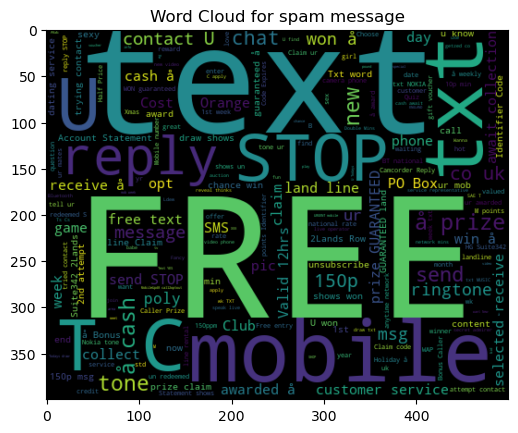

In [20]:
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for spam message')
plt.show()

### using traditional calculation

In [15]:
def make_dict(s):
    d={}
    for w in s:
        if w in d:
            d[w]=d[w]+1
        else:
            d[w]=1
    return d

diction=make_dict(filtered_sentence)

In [18]:
lst=[(diction[w],w) for w in diction]
lst.sort()
lst.reverse()
i=1
cnt=0
for count,word in lst[:100]:
    if len(word)!=1:  #filter out puncts and digits
        print('%d.%4d  %s'%(i,int(count),word))
        cnt+=1
    i+=1

10. 107  ur
12.  97  FREE
14.  95  mobile
15.  78  claim
16.  72  txt
17.  70  text
18.  69  Txt
19.  68  prize
21.  63  free
22.  58  week
23.  58  reply
24.  57  cash
25.  56  contact
26.  56  150p
27.  54  STOP
30.  49  won
31.  48  send
32.  47  service
33.  47  Nokia
35.  43  stop
36.  42  new
38.  39  customer
39.  39  Text
40.  39  Reply
41.  37  awarded
42.  36  min
43.  35  å£1000
44.  35  tone
46.  34  draw
47.  34  18
48.  33  phone
49.  33  line
50.  31  shows
51.  31  msg
52.  31  Claim
53.  30  receive
54.  30  Mobile
55.  30  16
57.  28  win
58.  28  number
59.  28  PO
60.  27  Free
61.  26  message
62.  26  latest
63.  26  guaranteed
64.  26  find
65.  26  collection
66.  26  1st
67.  25  word
68.  25  selected
69.  25  mins
70.  25  know
71.  25  entry
72.  25  award
73.  24  landline
75.  23  WON
76.  23  GUARANTEED
77.  22  å£100
78.  22  wk
79.  22  weekly
80.  22  attempt
81.  22  apply
82.  21  network
83.  21  Valid
84.  21  UK
85.  21  T&C
86.  21  SAE
87.  21  

In [19]:
cnt

81